In [1]:
import numpy as np
from scipy.integrate import solve_ivp

# matplotlib imports
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib.animation as animation

# Path for saved files
saved_path = "/home/whcheng/matplotlib_practice/latex_font_prac/simple_pendulum/"

$\begin{bmatrix} \dot \theta \\ \ddot \theta \end{bmatrix} = \begin{bmatrix} \dot \theta \\ - \dfrac{g \sin \theta}{\ell}\end{bmatrix}$

In [2]:
# assign constants (g, ell) values
g = 9.81
ell = 1

# initial conditions: theta=30 deg, velocity=0
theta0 = np.deg2rad(30)
theta_dot0 = 0

# our system of differential equations
# y[0] is theta, y[1] is theta_dot
def pendulum_ODE(t, y): 
    return (y[1], -g*np.sin(y[0])/ell)

# solve the ODE, 30 fps
sol = solve_ivp(pendulum_ODE, [0, 5], (theta0, theta_dot0), 
    t_eval=np.linspace(0,5,30*5))

# output of the solver
theta, theta_dot = sol.y
t = sol.t

# convert from radians to degrees
theta_deg = np.rad2deg(sol.y[0])
theta_dot_deg = np.rad2deg(sol.y[1])

# optional: save theta_deg in a CSV file
np.savetxt(saved_path + "pend.csv", np.transpose([t, theta_deg, theta_dot_deg]), delimiter=',')

In [3]:
# bonus! Customize color scheme in matplotlib
# change matplotlib defaults

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.monospace": 'Helvetica'
})

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "sans-serif",
#     "font.sans-serif": "Helvetica"
# })

# plt.rcParams.update({
#     "text.usetex": True,
#     "font.family": "monospace",
#     "font.monospace": 'Computer Modern Typewriter'
# })

# plt.rcParams['axes.facecolor'] = 'black'
# plt.rcParams['axes.labelcolor'] = 'white'
# plt.rcParams['axes.titlecolor'] = 'white'
# plt.rcParams['figure.facecolor'] = 'black'
# plt.rcParams['legend.labelcolor'] = 'white'
# plt.rcParams['xtick.labelcolor'] = 'white'
# plt.rcParams['ytick.labelcolor'] = 'white'
# plt.rcParams['grid.color'] = '#707070'

plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['axes.titlecolor'] = 'black'
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['legend.labelcolor'] = 'black'
plt.rcParams['xtick.labelcolor'] = 'black'
plt.rcParams['ytick.labelcolor'] = 'black'
plt.rcParams['grid.color'] = '#707070'

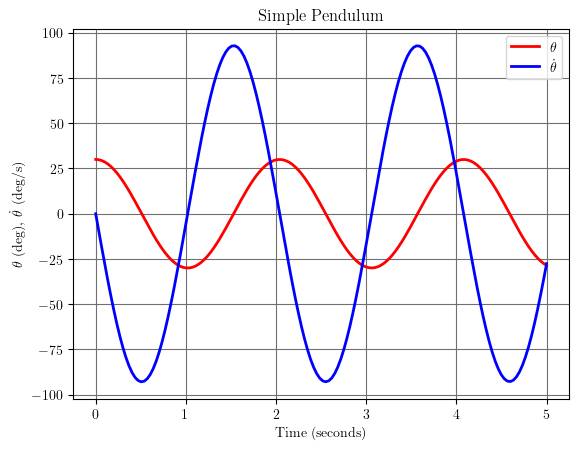

In [4]:
# create a plot of theta and theta_dot vs time
plt.plot(t, theta_deg, 'r', lw=2, label=r'$\theta$')
plt.plot(t, theta_dot_deg, 'b', lw=2, label=r'$\dot \theta$')
plt.title('Simple Pendulum')
plt.legend()
plt.xlabel('Time (seconds)')
plt.ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
plt.grid()
plt.show()

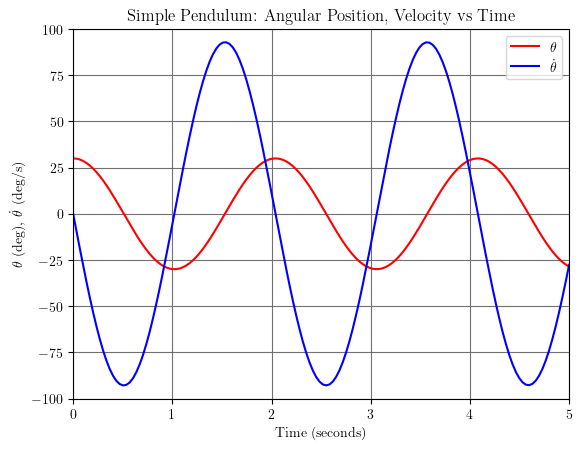

In [5]:
# animate theta, theta_dot vs time
fig, ax = plt.subplots()

theta_curve, = ax.plot(t[0], theta_deg[0], 'r')
theta_dot_curve, = ax.plot(t[0], theta_dot_deg[0], 'b')

ax.set_title('Simple Pendulum: Angular Position, Velocity vs Time')
ax.set_xlim(0, 5)
ax.set_ylim(-100, 100)
ax.set_xlabel('Time (seconds)')
ax.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax.legend([r'$\theta$', r'$\dot \theta$'])
ax.grid()

def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

# save video @ 30 fps
anim = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
anim.save(saved_path + "time_domain.mp4", writer=ffmpeg_writer)
# you need to make sure the ffmpeg is installed on your machine and 
# the path is configured correctly. see Troubleshooting for details
# For linux users, go $ sudo apt install ffmpeg

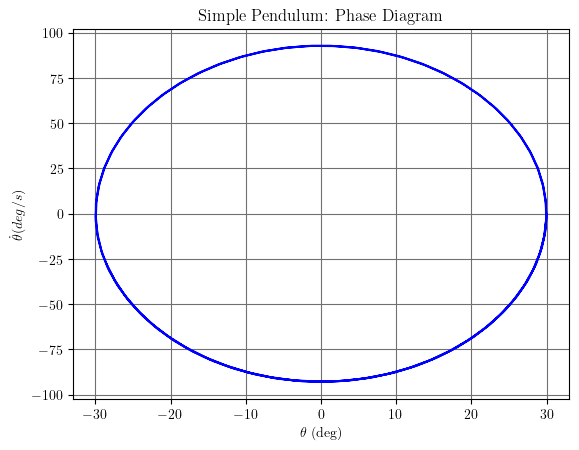

In [6]:
# create a phase diagram of theta, theta_dot
plt.plot(theta_deg, theta_dot_deg, 'b')
plt.title('Simple Pendulum: Phase Diagram')
plt.xlabel(r'$\theta$ (deg)')
plt.ylabel(r'$\dot \theta (deg/s)$')
plt.grid()
plt.show()

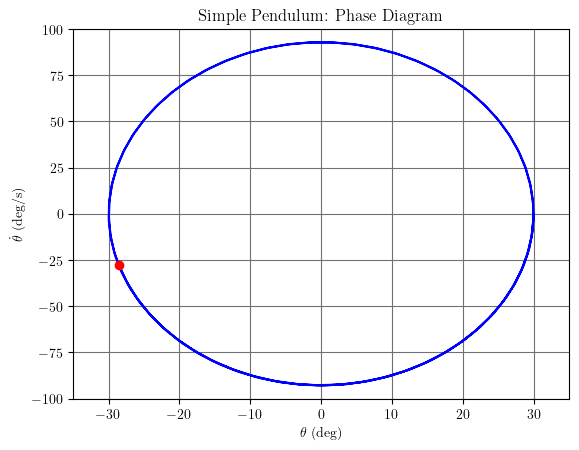

In [7]:
# animate the phase diagram
fig, ax = plt.subplots()

phase_curve, = ax.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, =  ax.plot(theta_deg[0], theta_dot_deg[0], 'ro')

ax.set_title('Simple Pendulum: Phase Diagram')
ax.set_xlim(-35, 35)
ax.set_ylim(-100, 100)
ax.set_xlabel(r'$\theta$ (deg)')
ax.set_ylabel(r'$\dot \theta$ (deg/s)')
ax.grid()

def animate(i):
    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data(theta_deg[i], theta_dot_deg[i])

ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save(saved_path + "phase_diagram.mp4", writer=ffmpeg_writer)

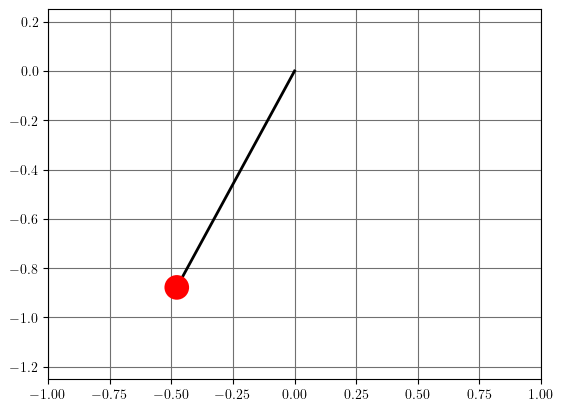

In [8]:
# create an animation of the pendulum swining with Matplotlib
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

# create figure
fig = plt.figure()
ax = fig.add_subplot(aspect='equal')
ax.set_xlim(-1, 1)
ax.set_ylim(-1.25, 0.25)
ax.grid()

x0, y0 = pend_pos(theta0)
line, = ax.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))

# animate each frame "i"
def animate(i):
    x,y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save(saved_path + "pend.mp4", writer=ffmpeg_writer)

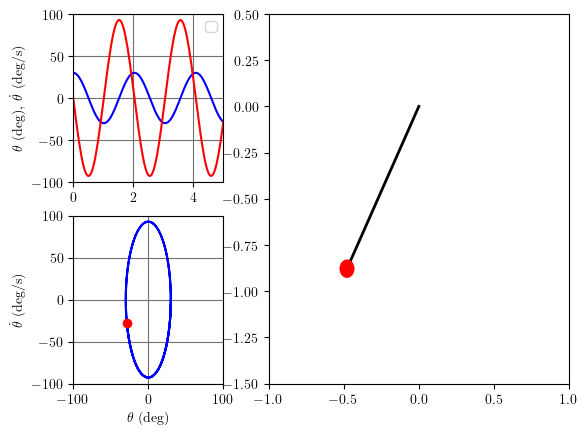

In [9]:
# animate everything together!
fig = plt.figure()
gs = gridspec.GridSpec(2,2, width_ratios=[1,2], height_ratios=[1,1])

# theta, theta_dot vs time
ax0 = fig.add_subplot(gs[0,0])
ax0.set_xlim(0, 5)
ax0.set_ylim(-100, 100)
ax0.set_ylabel(r'$\theta$ (deg), $\dot \theta$ (deg/s)')
ax0.legend([r'$\theta$', r'$\dot \theta$'])
ax0.grid()

theta_curve, = ax0.plot(t[0], theta_deg[0], 'b')
theta_dot_curve, = ax0.plot(t[0], theta_dot_deg[0], 'r')

# phase diagram
ax1 = fig.add_subplot(gs[1,0])
ax1.set_xlim(-100, 100)
ax1.set_ylim(-100, 100)
ax1.set_xlabel(r'$\theta$ (deg)')
ax1.set_ylabel(r'$\dot \theta$ (deg/s)')
ax1.grid()

phase_curve, = ax1.plot(theta_deg[0], theta_dot_deg[0], 'b')
phase_dot, =  ax1.plot(theta_deg[0], theta_dot_deg[0], 'ro')

# pendulum
def pend_pos(theta):
    return (ell*np.sin(theta), -ell*np.cos(theta))

ax2 = fig.add_subplot(gs[:,1])
ax2.set_xlim(-1, 1)
ax2.set_ylim(-1.5, 0.5)

# draw the pendulum
x0, y0 = pend_pos(theta0)
line, = ax2.plot([0, x0], [0, y0], lw=2, c='k')
circle = ax2.add_patch(plt.Circle(pend_pos(theta0), 0.05, fc='r', zorder=3))


def animate(i):
    theta_curve.set_data(t[:i+1], theta_deg[:i+1])
    theta_dot_curve.set_data(t[:i+1], theta_dot_deg[:i+1])

    phase_curve.set_data(theta_deg[:i+1], theta_dot_deg[:i+1])
    phase_dot.set_data((theta_deg[i], theta_dot_deg[i]))

    x, y = pend_pos(theta[i])
    line.set_data([0, x], [0, y])
    circle.set_center((x, y))

# save a video: 30 fps
ani = animation.FuncAnimation(fig, animate, frames=len(t))
ffmpeg_writer = animation.FFMpegWriter(fps=30)
ani.save(saved_path + "all.mp4", writer=ffmpeg_writer)